In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import  KElbowVisualizer
from sklearn.neighbors import LocalOutlierFactor

In [3]:
df = pd.read_csv('./assets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df['Gender'] = df['Gender'].apply(lambda g: 0 if g == 'Male' else 1)
df.drop(columns=['CustomerID'], inplace=True)

## Escolhendo features

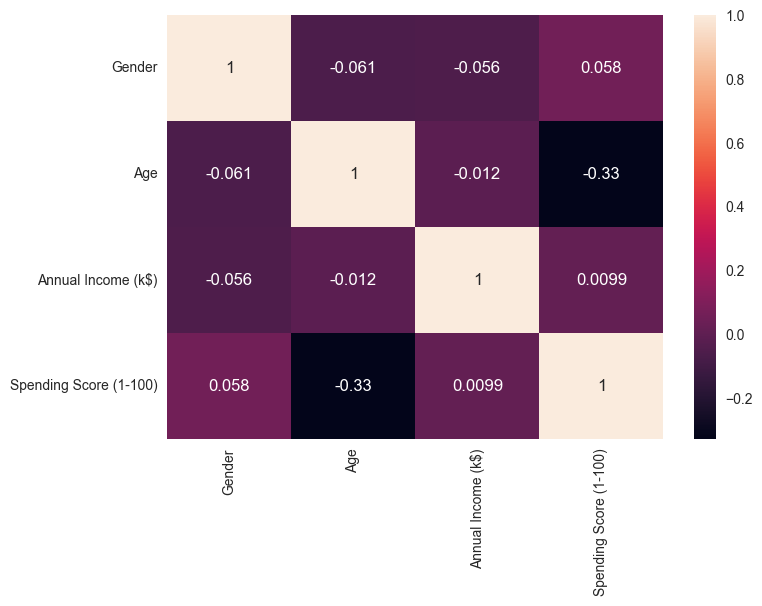

In [7]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

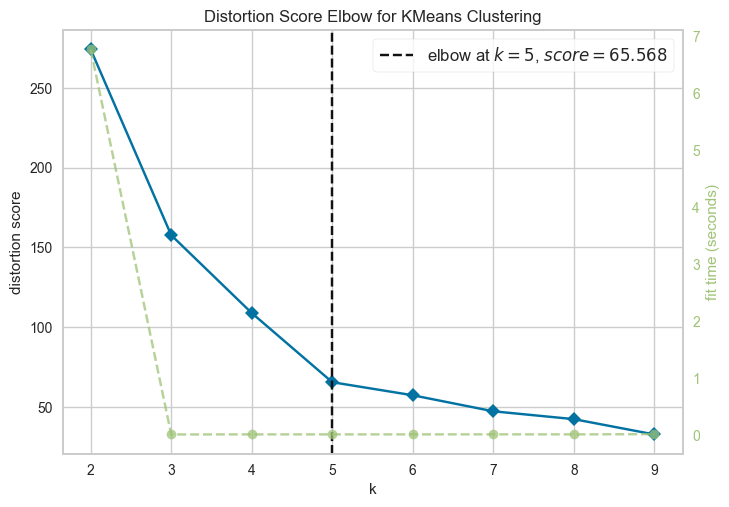

In [9]:
model = KMeans(
    init='k-means++',
    random_state=0,
    algorithm='elkan'
    )

visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_scaled)
visualizer.show()
plt.show()


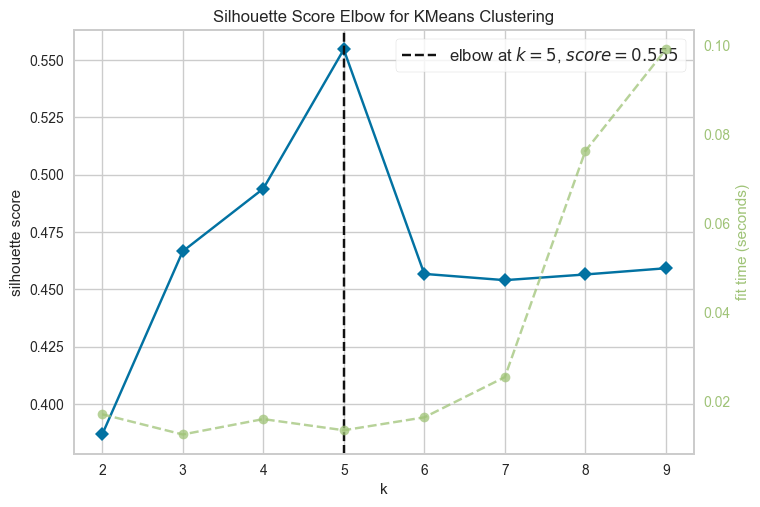

In [10]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_scaled)
visualizer.show()
plt.show()

## Aplicação de modelos

In [11]:
model = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=0,
    algorithm='elkan'
    )

df['cluster'] = model.fit_predict(X_scaled)

In [22]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
df['lof_prediction'] = lof.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

## Resultados

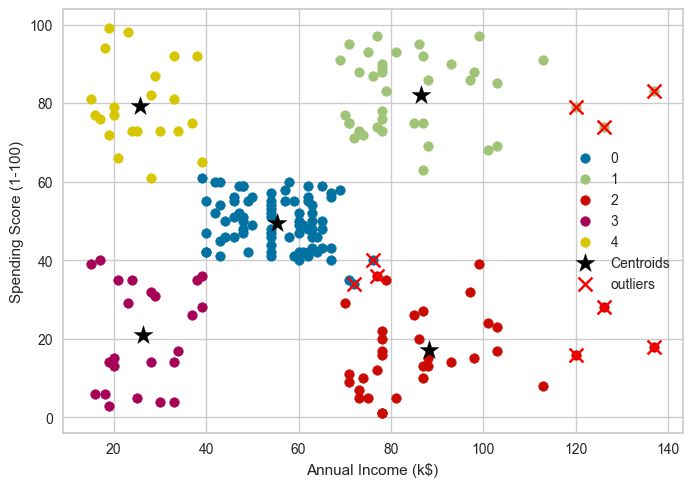

In [ ]:
for c in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == c]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=str(c))

centroids_original = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
             c='black', marker='*', s=200, label='Centroids')

outliers = df[df['lof_prediction'] == -1]
plt.scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
             c='red', marker='x', s=100, label='Outliers')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
df.drop(df[df['lof_prediction'] == -1].index, inplace=True)

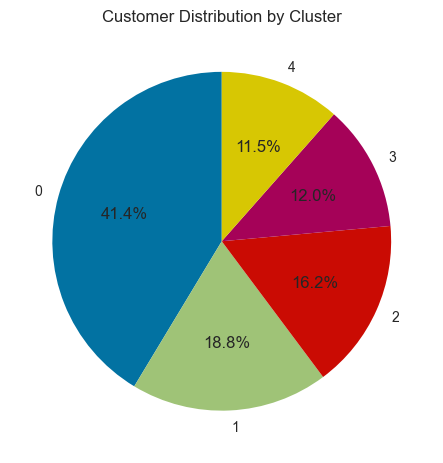

In [26]:
counts = df.cluster.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Cluster')
plt.show()

0: Ganha médio gasta médio   
1: Ganha muito gasta muito  
2: Ganha pouco gasta muito  
3: Ganha pouco gasta pouco  
4: Ganha muito gasta pouco  

Top 10 pontos com maior score LOF (mais prováveis outliers):
     Feature1  Feature2  prediction  lof_score  lof_score_positive
401 -5.000000 -5.000000          -1 -13.638032           13.638032
400  5.000000  5.000000          -1 -11.231287           11.231287
405  4.500000 -4.000000          -1  -9.239597            9.239597
402  0.000000  5.000000          -1  -8.201255            8.201255
403  5.000000  0.000000          -1  -7.841648            7.841648
404 -4.000000  4.500000          -1  -7.526772            7.526772
104 -1.845486 -0.844181          -1  -3.119804            3.119804
131 -2.972380 -2.307316          -1  -2.562840            2.562840
239  2.923664 -1.664128          -1  -2.042517            2.042517
110 -1.305602 -2.560180          -1  -2.001042            2.001042


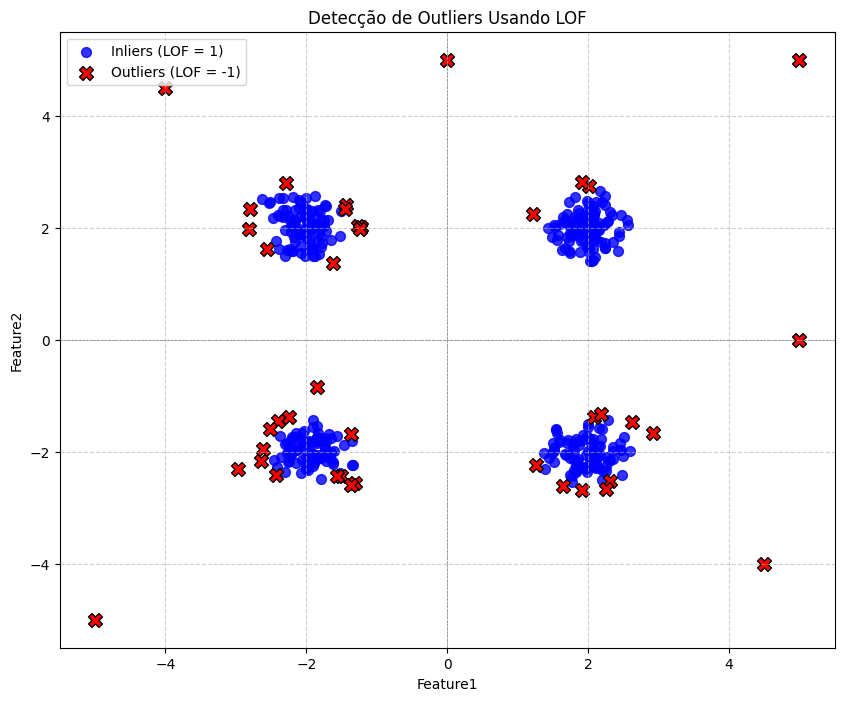

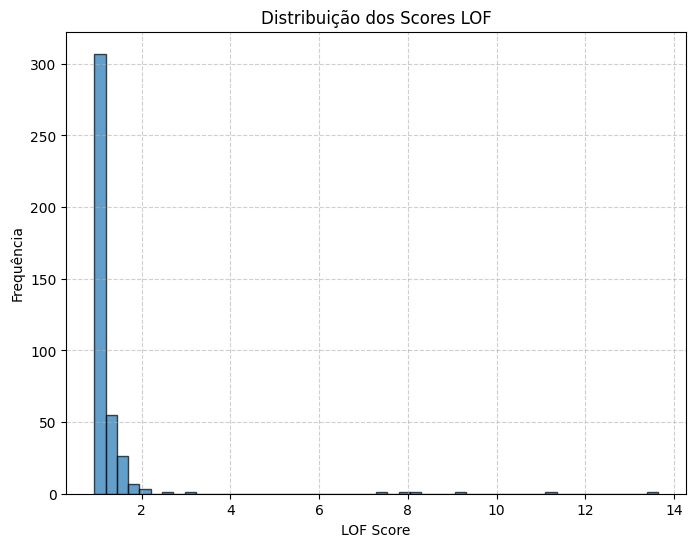


Número de pontos antes da remoção: 406
Número de pontos após remover outliers com LOF > 1.5: 371


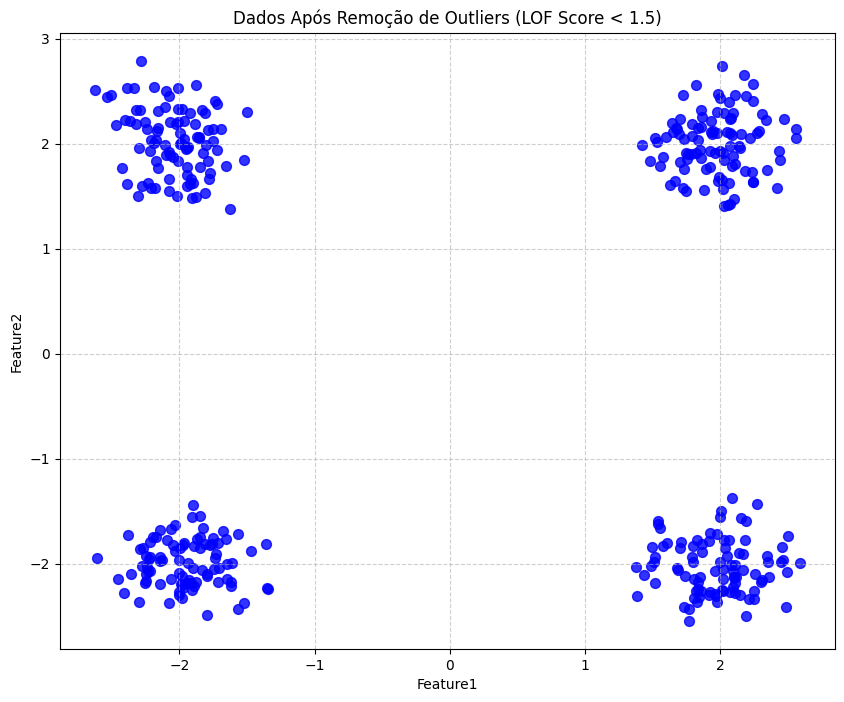

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd # Para facilitar a visualização e manipulação

# 1. Gerar dados de exemplo com outliers
np.random.seed(42)

# Dados "normais" (clusters)
X1 = 0.3 * np.random.randn(100, 2) + np.array([2, 2])
X2 = 0.3 * np.random.randn(100, 2) + np.array([-2, -2])
X3 = 0.3 * np.random.randn(100, 2) + np.array([2, -2])
X4 = 0.3 * np.random.randn(100, 2) + np.array([-2, 2])

# Outliers
outliers = np.array([
    [5, 5],
    [-5, -5],
    [0, 5],
    [5, 0],
    [-4, 4.5],
    [4.5, -4]
])

X = np.vstack([X1, X2, X3, X4, outliers])

# Criar um DataFrame para facilitar
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# 2. Instanciar o Modelo LOF
# n_neighbors: k (número de vizinhos)
# contamination: proporção esperada de outliers (para o método predict())
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # Contamination = 10% dos dados são outliers

# 3. Ajustar o Modelo e Obter os Scores de Outlier
# .fit_predict() retorna -1 para outliers e 1 para inliers
df['prediction'] = lof.fit_predict(df[['Feature1', 'Feature2']])

# O atributo .negative_outlier_factor_ armazena os scores brutos
# Lembre-se: quanto mais negativo, mais provável ser um outlier
df['lof_score'] = lof.negative_outlier_factor_

# Inverter o sinal para que scores mais altos indiquem maior anomalia
df['lof_score_positive'] = -df['lof_score']

# 4. Analisar e Visualizar os Resultados

# Ver os pontos com os maiores scores LOF (mais prováveis outliers)
print("Top 10 pontos com maior score LOF (mais prováveis outliers):")
print(df.sort_values(by='lof_score_positive', ascending=False).head(10))

# Visualizar os dados e os outliers detectados
plt.figure(figsize=(10, 8))

# Plotar os pontos "normais"
plt.scatter(df[df['prediction'] == 1]['Feature1'], df[df['prediction'] == 1]['Feature2'],
            c='blue', label='Inliers (LOF = 1)', s=50, alpha=0.8)

# Plotar os pontos detectados como outliers
plt.scatter(df[df['prediction'] == -1]['Feature1'], df[df['prediction'] == -1]['Feature2'],
            c='red', label='Outliers (LOF = -1)', s=100, marker='X', edgecolor='black')

# Opcional: Adicionar rótulos para os scores LOF dos outliers para melhor visualização
# for i, row in df[df['prediction'] == -1].iterrows():
#     plt.text(row['Feature1'] + 0.1, row['Feature2'] + 0.1, f'{row["lof_score_positive"]:.2f}', fontsize=9, color='red')


plt.title('Detecção de Outliers Usando LOF')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Como decidir o limite para remover outliers:
# Você pode inspecionar a distribuição dos scores LOF
plt.figure(figsize=(8, 6))
plt.hist(df['lof_score_positive'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Scores LOF')
plt.xlabel('LOF Score')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Remover outliers com base em um limite no LOF Score (ex: scores acima de 1.5)
lof_threshold = 1.5 # Este valor é empírico e deve ser ajustado
df_filtered = df[df['lof_score_positive'] < lof_threshold]

print(f"\nNúmero de pontos antes da remoção: {len(df)}")
print(f"Número de pontos após remover outliers com LOF > {lof_threshold}: {len(df_filtered)}")

# Visualize os dados filtrados
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['Feature1'], df_filtered['Feature2'], c='blue', s=50, alpha=0.8)
plt.title(f'Dados Após Remoção de Outliers (LOF Score < {lof_threshold})')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()